In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")

In [3]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
print("\n--- Data Info ---")
print(df.info())
print("\n--- Summary Statistics ---")
print(df.describe())



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None

--- Summary Statistics ---
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872   

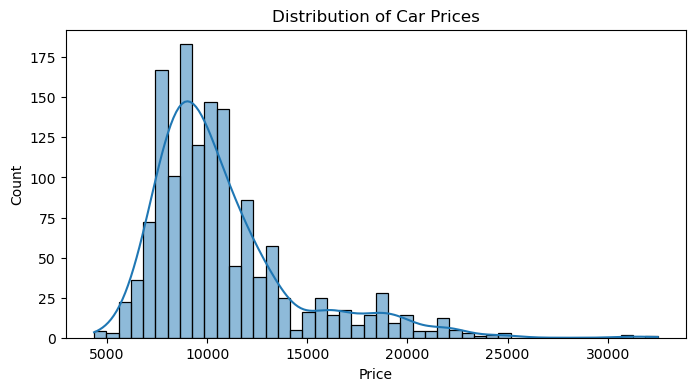

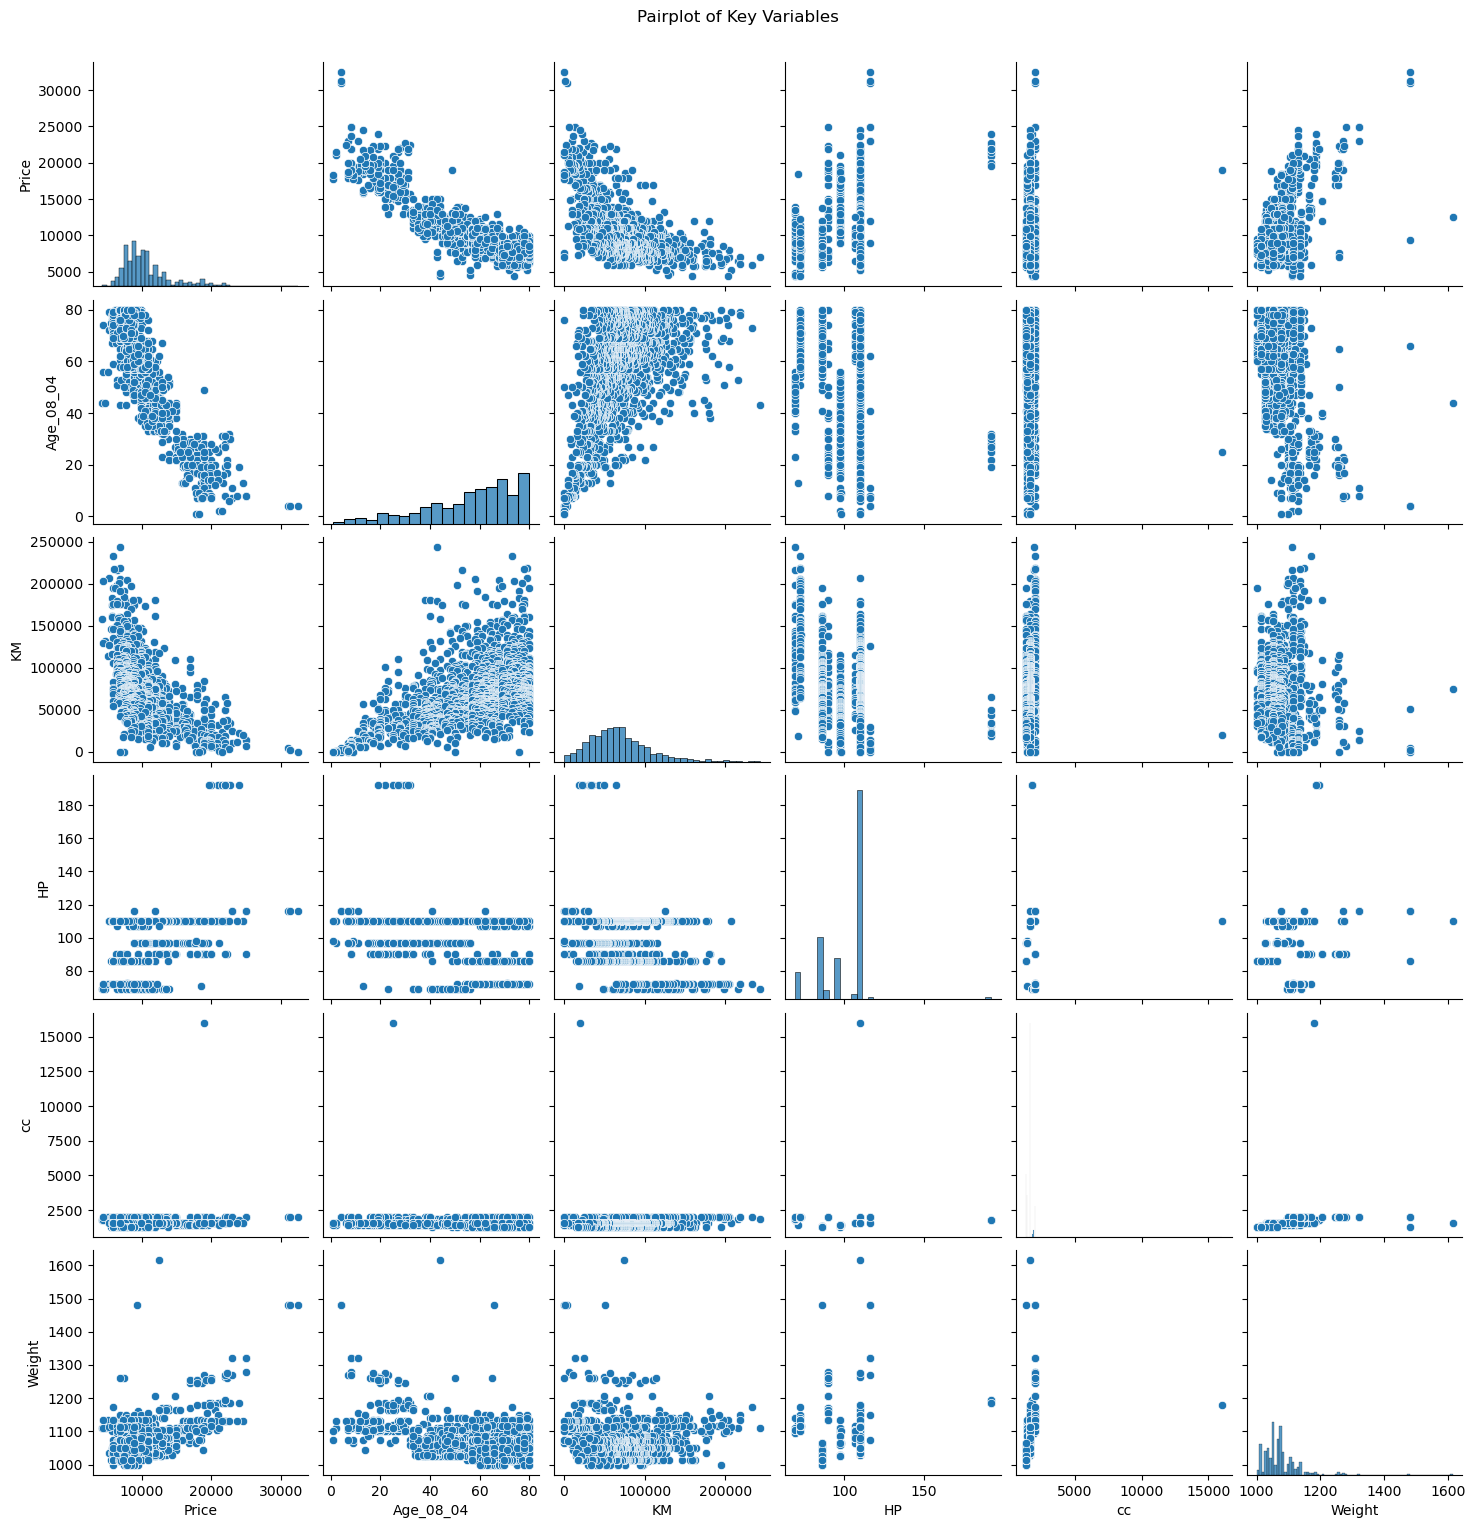

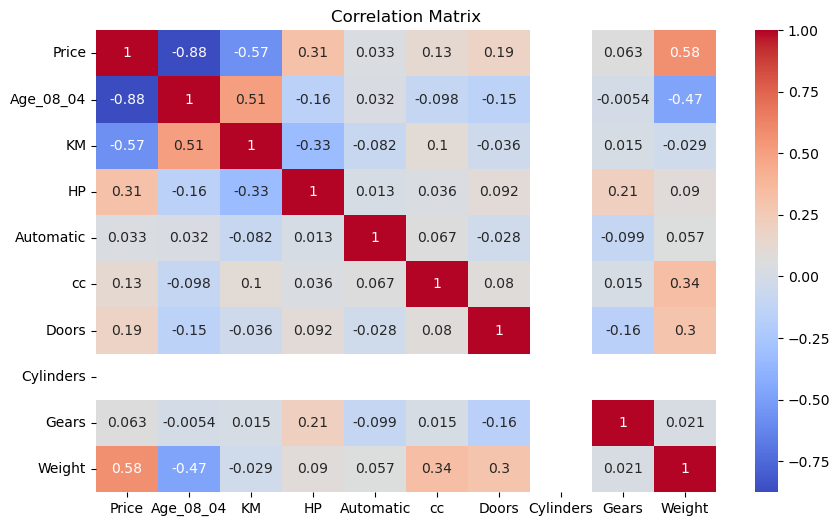

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()

sns.pairplot(df[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']])
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [7]:
print(df.columns.tolist())


['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']


In [16]:
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})

In [19]:
features = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Weight']
X = df[features]
y = df['Price']

In [20]:
print(df.columns.tolist())

['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight', 'FuelType']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
lr1 = LinearRegression()
lr1.fit(X_train_scaled, y_train)
y_pred1 = lr1.predict(X_test_scaled)


In [31]:
reduced_features = ['Age_08_04', 'KM', 'FuelType', 'HP', 'Automatic', 'Weight']
X2 = df[reduced_features]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

lr2 = LinearRegression()
lr2.fit(X2_train_scaled, y2_train)
y_pred2 = lr2.predict(X2_test_scaled)


In [33]:
simple_features = ['Age_08_04', 'KM', 'Weight']
X3 = df[simple_features]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)
X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)

lr3 = LinearRegression()
lr3.fit(X3_train_scaled, y3_train)
y_pred3 = lr3.predict(X3_test_scaled)

In [34]:
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr1.coef_
})
print("\n--- Model 1 Coefficients ---")
print(coef_df)


--- Model 1 Coefficients ---
     Feature  Coefficient
0  Age_08_04 -2278.073983
1         KM  -626.080806
2  Fuel_Type  -348.970946
3         HP   327.478954
4  Automatic    43.371889
5         cc   -33.413077
6      Doors   -57.663371
7     Weight  1209.886119


In [35]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation:")
    print("R2 Score:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

evaluate_model(y_test, y_pred1, "Model 1")
evaluate_model(y2_test, y_pred2, "Model 2")
evaluate_model(y3_test, y_pred3, "Model 3")



Model 1 Evaluation:
R2 Score: 0.8411467309385144
RMSE: 1455.8659368977437

Model 2 Evaluation:
R2 Score: 0.8413651495318518
RMSE: 1454.864706097686

Model 3 Evaluation:
R2 Score: 0.8324973071292439
RMSE: 1494.9759401829617


In [36]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_ridge = ridge.predict(X_test_scaled)
evaluate_model(y_test, y_ridge, "Ridge Regression")



Ridge Regression Evaluation:
R2 Score: 0.8411985949687844
RMSE: 1455.6282545398296


In [37]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_lasso = lasso.predict(X_test_scaled)
evaluate_model(y_test, y_lasso, "Lasso Regression")


Lasso Regression Evaluation:
R2 Score: 0.8411575616170556
RMSE: 1455.8163052948462


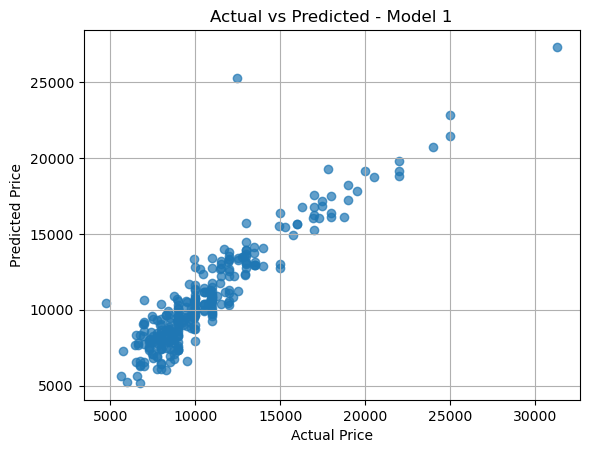

In [38]:
plt.scatter(y_test, y_pred1, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted - Model 1")
plt.grid(True)
plt.show()

In [ ]:
'''
Interview Questions:
1)What is Normalization & Standardization and how is it helpful?
Normalization and Standardization are feature scaling techniques used to bring data to a comparable scale
so that no feature dominates others in machine learning models.

Normalization:
It rescales values into a fixed range, typically [0,1].
Useful when features have different units or ranges (e.g., age in years vs. salary in rupees).
Commonly applied in distance-based algorithms like KNN, K-Means, Neural Networks.

Standardization:
It transforms data to have mean = 0 and standard deviation = 1.
Useful when data needs to follow a normal distribution or when algorithms assume 
standardized input (e.g., Linear Regression, Logistic Regression, SVM, PCA).
'''

In [ ]:
'''
2)What techniques can be used to address multicollinearity in multiple linear regression?
Multicollinearity occurs when independent variables in a regression model are highly correlated with each other.
This makes it difficult to assess the effect of each predictor individually and can lead to unstable coefficient estimates.

Techniques to address multicollinearity:

1)Detect Multicollinearity (first step):
Check Correlation Matrix (high correlation between predictors).
Calculate Variance Inflation Factor (VIF) (VIF > 10 indicates high multicollinearity).

2)Techniques to Handle It:
Remove Highly Correlated Variables: Drop one of the correlated predictors.
Combine Variables: Create a new feature (e.g., averaging or summing related predictors).
Principal Component Analysis (PCA): Reduce dimensionality by transforming correlated variables into uncorrelated components.

3)Regularization Methods:
Ridge Regression (L2): Shrinks coefficients, reduces variance.
Lasso Regression (L1): Performs variable selection by shrinking some coefficients to zero.
Increase Sample Size: More data can sometimes reduce the effect of multicollinearity.

'''